<a href="https://colab.research.google.com/github/rafaelcostaleite/lab-finances/blob/main/Fronteira_Eficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fronteira Eficiente de Markowitz

In [ ]:
# vamos importar os módulos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

### Vamos usar os dados do Yahoo Finance ou do Google Finance

In [ ]:
# download dos dados pelo Yahoo Finance!

start = datetime(2015, 1, 1)
end = datetime(2020, 12, 31)
acoes = ['BCFF11.SA','ITSA4.SA','BBDC4.SA','BPFF11.SA','MXRF11.SA','QAGR11.SA','RECT11.SA','MFII11.SA','SDIL11.SA','XPML11.SA']
dados = web.get_data_yahoo(acoes, start, end)['Adj Close']

In [ ]:
# checando os dados
dados.describe()

Symbols,BBDC4.SA,BCFF11.SA,BPFF11.SA,ITSA4.SA,MFII11.SA,MXRF11.SA,QAGR11.SA,RECT11.SA,SDIL11.SA,XPML11.SA
count,1430.000000,652.000000,1430.000000,1430.000000,1430.000000,1430.000000,202.000000,357.000000,1430.000000,649.000000
mean,21.242095,78.679254,87.991770,8.191094,107.209069,9.678378,88.522178,99.695070,89.939814,107.307982
std,7.514384,1.273457,14.121076,2.797761,15.830050,1.198003,13.005109,6.267586,17.931255,12.372272
min,8.578559,69.618668,55.778229,3.781972,66.059998,7.621820,64.010002,78.099998,53.054832,83.849998
25%,14.621403,78.910004,77.256050,5.526345,91.785286,8.730969,79.555002,97.050003,74.748528,100.610001
50%,20.426651,78.910004,90.384998,8.081153,107.405460,9.505675,84.000000,99.900002,90.524193,105.989998
75%,26.385612,78.910004,95.667500,10.663145,120.287502,10.590000,100.297501,102.870003,102.300003,110.250000
max,37.160065,90.059998,130.339996,13.962344,157.130005,14.520000,123.000000,124.699997,154.300003,147.000000


In [ ]:
dados.tail()

Symbols,BBDC4.SA,BCFF11.SA,BPFF11.SA,ITSA4.SA,MFII11.SA,MXRF11.SA,QAGR11.SA,RECT11.SA,SDIL11.SA,XPML11.SA
Date,,,,,,,,,,
2020-09-28,19.700811,NaN,81.970001,8.97,126.129997,10.94,83.010002,96.690002,101.769997,105.690002
2020-09-29,19.231268,NaN,82.000000,8.82,126.900002,10.95,82.699997,97.150002,101.290001,105.160004
2020-09-30,19.391113,NaN,83.500000,8.80,129.490005,10.91,82.500000,97.150002,101.050003,104.980003
2020-10-01,19.481026,NaN,82.400002,8.90,127.160004,10.57,82.720001,97.449997,100.470001,105.449997
2020-10-02,19.639999,90.059998,82.000000,8.92,127.489998,10.43,82.970001,97.400002,101.150002,106.900002


### Calculando os retornos

In [ ]:
# calculo dos retornos diários e anuais
retorno_diario = dados.pct_change()
retorno_anual = retorno_diario.mean() * 250

In [ ]:
retorno_diario.tail()

Symbols,BBDC4.SA,BCFF11.SA,BPFF11.SA,ITSA4.SA,MFII11.SA,MXRF11.SA,QAGR11.SA,RECT11.SA,SDIL11.SA,XPML11.SA
Date,,,,,,,,,,
2020-09-28,-0.003033,0.0000,0.001589,-0.005543,-0.000317,0.006440,-0.008717,0.001969,0.000295,-0.002830
2020-09-29,-0.023834,0.0000,0.000366,-0.016722,0.006105,0.000914,-0.003735,0.004757,-0.004716,-0.005015
2020-09-30,0.008312,0.0000,0.018293,-0.002268,0.020410,-0.003653,-0.002418,0.000000,-0.002369,-0.001712
2020-10-01,0.004637,0.0000,-0.013174,0.011364,-0.017994,-0.031164,0.002667,0.003088,-0.005740,0.004477
2020-10-02,0.008160,0.1413,-0.004854,0.002247,0.002595,-0.013245,0.003022,-0.000513,0.006768,0.013751


### Calculando a covariância

In [ ]:
# cálculo da covariância diária e anual
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250

### Criando listas para armanezar as principais variáveis

In [ ]:
# vamos criar 4 listas para armazenar os valores do retorno da carteira, o peso de cada ação, a volatilidade e o sharpe ratio
# empty lists to store returns, volatility and weights of imiginary portfolios
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

### Simulando o número de portfólios

In [ ]:
# vamos usar uma simulação aleatória
numero_acoes = len(acoes)
numero_carteiras = 100000

np.random.seed(101)

In [ ]:
# vamos fazer um for loop para preencher as lista que criamos anteriormente
for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_anual)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

### Criando dicionário com os dados

In [ ]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]

# vamos transformar nosso dicionário em um dataframe
df = pd.DataFrame(carteira)

# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]

### Criando o gráfico da fronteira eficiente

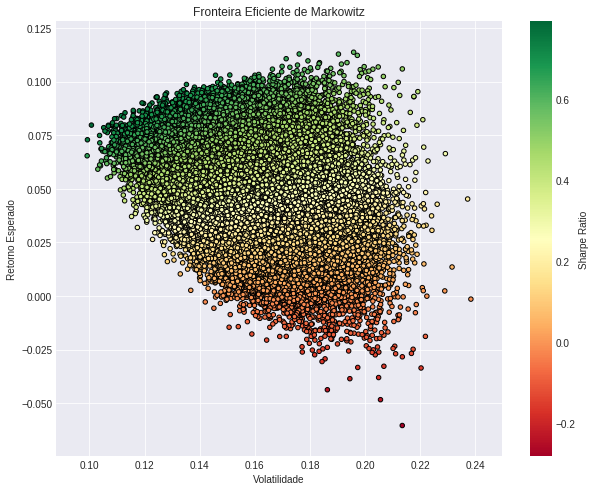

In [ ]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Identificando o melhor Sharpe Ratio e a carteira de mínima variância

In [ ]:
# vamos identificar as variáveis de interesse
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()

# vamos identificar os dois principais portfolios
carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]

### Criando novo gráfico da fronteira eficiente

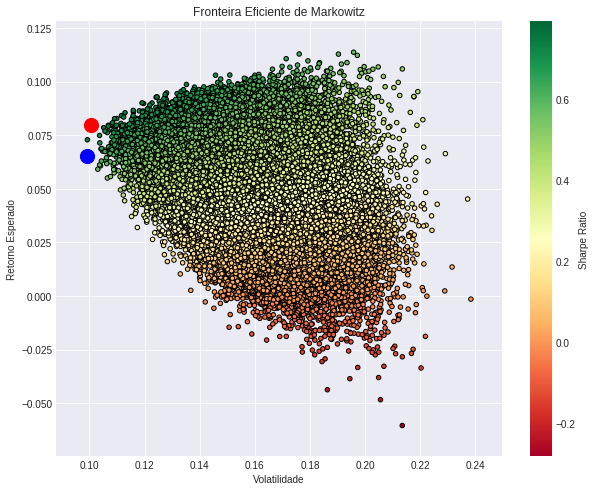

In [ ]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=200 )
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Analisando as duas principais carteiras

In [ ]:
print "Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T
print '\n'
print "Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T

Essa é a carteira de Mínima Variância: 
                   51876
Retorno         0.065418
Volatilidade    0.099174
Sharpe Ratio    0.659630
BCFF11.SA Peso  0.006960
ITSA4.SA Peso   0.262951
BBDC4.SA Peso   0.063879
BPFF11.SA Peso  0.004724
MXRF11.SA Peso  0.156045
QAGR11.SA Peso  0.134267
RECT11.SA Peso  0.010554
MFII11.SA Peso  0.036925
SDIL11.SA Peso  0.074691
XPML11.SA Peso  0.249006


Essa é a carteira com maior Sharpe Ratio: 
                   38712
Retorno         0.079734
Volatilidade    0.100719
Sharpe Ratio    0.791645
BCFF11.SA Peso  0.018572
ITSA4.SA Peso   0.358623
BBDC4.SA Peso   0.038056
BPFF11.SA Peso  0.044343
MXRF11.SA Peso  0.215602
QAGR11.SA Peso  0.074726
RECT11.SA Peso  0.005239
MFII11.SA Peso  0.049367
SDIL11.SA Peso  0.135277
XPML11.SA Peso  0.060194
